# Exploratory data analysis on rental pricing of Getaround Data
Let's dive into given data to figure out
*    how complete dataset is
*    what are the feature (column) distributions like
*    identifying outliers
*    any relationship between target and features


## Setup libraries and data

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
f_pricing= '../data/get_around_pricing_project.csv'

In [8]:
dataset = pd.read_csv(f_pricing,index_col=0)
dataset.head(5)


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


## Any missing data? 

Any missing data? Data distribution?

In [10]:
cols_cat  = ['model_key',  'fuel', 'paint_color',
            'car_type', 'private_parking_available', 'has_gps',
            'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
            'has_speed_regulator', 'winter_tires']
cols_num = ['mileage', 'engine_power','rental_price_per_day']

## Distribution of categorical features

In [11]:
dataset[cols_cat[0]].value_counts(dropna=False)

Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: model_key, dtype: int64

In [12]:
dataset[cols_cat[1]].value_counts(dropna=False)

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64

In [13]:
dataset[cols_cat[2]].value_counts(dropna=False)

black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: paint_color, dtype: int64

In [14]:
dataset[cols_cat[3]].value_counts(dropna=False)

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [15]:
dataset[cols_cat[4]].value_counts(dropna=False)

True     2662
False    2181
Name: private_parking_available, dtype: int64

In [16]:
dataset[cols_cat[5]].value_counts(dropna=False)

True     3839
False    1004
Name: has_gps, dtype: int64

In [17]:
dataset[cols_cat[6]].value_counts(dropna=False)

False    3865
True      978
Name: has_air_conditioning, dtype: int64

In [18]:
dataset[cols_cat[7]].value_counts(dropna=False)

False    3881
True      962
Name: automatic_car, dtype: int64

In [19]:
dataset[cols_cat[8]].value_counts(dropna=False)

False    2613
True     2230
Name: has_getaround_connect, dtype: int64

In [20]:
dataset[cols_cat[9]].value_counts(dropna=False)

False    3674
True     1169
Name: has_speed_regulator, dtype: int64

In [21]:
dataset[cols_cat[10]].value_counts(dropna=False)

True     4514
False     329
Name: winter_tires, dtype: int64

## Distribution of numerical features and target


Description of data distribution

count    4.843000e+03
mean     1.409628e+05
std      6.019674e+04
min     -6.400000e+01
25%      1.029135e+05
50%      1.410800e+05
75%      1.751955e+05
max      1.000376e+06
Name: mileage, dtype: float64

Plotted distribution



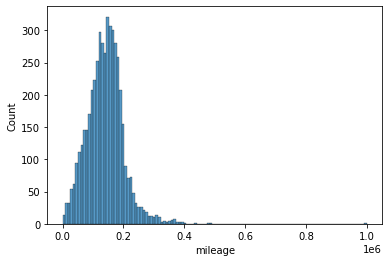

In [22]:
print('\nDescription of data distribution\n')
print(dataset[cols_num[0]].describe())
print('\nPlotted distribution\n')
sns.histplot(dataset, x= cols_num[0])
plt.show()


Description of data distribution

count    4843.00000
mean      128.98823
std        38.99336
min         0.00000
25%       100.00000
50%       120.00000
75%       135.00000
max       423.00000
Name: engine_power, dtype: float64

Plotted distribution



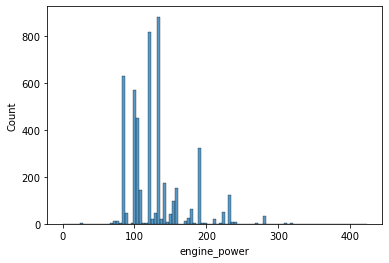

In [23]:
print('\nDescription of data distribution\n')
print(dataset[cols_num[1]].describe())
print('\nPlotted distribution\n')
sns.histplot(dataset, x= cols_num[1])
plt.show()


Description of data distribution

count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
25%       104.000000
50%       119.000000
75%       136.000000
max       422.000000
Name: rental_price_per_day, dtype: float64

Plotted distribution



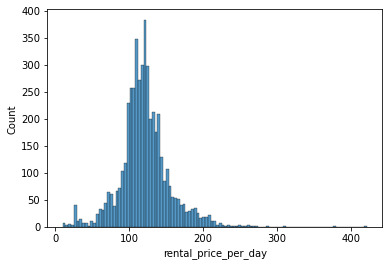

In [24]:
print('\nDescription of data distribution\n')
print(dataset[cols_num[2]].describe())
print('\nPlotted distribution\n')
sns.histplot(dataset, x= cols_num[2])
plt.show()

In [25]:
print('What is the most expensive car?\n')
m_cheapcar = dataset.rental_price_per_day == dataset.rental_price_per_day.max()
dataset.loc[m_cheapcar,:].transpose()

What is the most expensive car?



,4753
model_key,BMW
mileage,72515
engine_power,135
fuel,diesel
paint_color,blue
car_type,suv
private_parking_available,False
has_gps,False
has_air_conditioning,True
automatic_car,False


In [26]:
print('What is the cheapest car?\n')
m_cheapcar = dataset.rental_price_per_day == dataset.rental_price_per_day.min()
dataset.loc[m_cheapcar,:].transpose()

What is the cheapest car?



,565,630,879,1255,1832,2829,4356
model_key,Citroën,Peugeot,Peugeot,Citroën,BMW,Audi,BMW
mileage,179358,147558,134156,170381,174524,439060,79685
engine_power,120,105,105,135,85,105,190
fuel,diesel,diesel,diesel,diesel,diesel,diesel,diesel
paint_color,black,white,grey,silver,blue,silver,black
car_type,estate,estate,estate,estate,hatchback,sedan,suv
private_parking_available,False,False,False,True,False,False,False
has_gps,True,True,True,True,True,False,False
has_air_conditioning,False,False,False,False,False,True,False
automatic_car,False,False,False,False,False,False,False


## Outliers ?

Let's define a strategy to limit adverse effects of possible outliers.

**Categorical columns**
* some model names are not represented well. let's group them as others
* some paint colors are not reprented sufficiently. let's group them as others
* some fuel types are not represented sufficiently. let's group them as others

=> I consider 30 (which is 0.6% of whole data amount) as limit to apply other label 

**Numerical columns**
* some negative milage data exist
* some milage are data away from central valus
* some rental price are data away from central values

=> Let's concentrate on the central data, central 98% data in this case. Any data below %1 and above %99 in these numerical columns will be cut off.

In [27]:
def other_re (x,list_):
    y = x 
    if x in list_:
        y= 'others'
    return y

#preparing labels that will be replaced as other
list_model_other = ['Maserati', 'Suzuki', 'Porsche', 'Ford', 
                    'KIA Motors', 'Alfa Romeo', 'Fiat', 
                    'Lexus', 'Lamborghini', 'Mini', 'Mazda',
                    'Honda','Yamaha']


list_fuel_other = ['hybrid_petrol', 'electro']

list_color_other = ['green','orange']

dataset['model_key_'] = dataset['model_key'].apply(lambda x: other_re(x,list_model_other))
dataset['fuel_'] =  dataset['fuel'].apply(lambda x: other_re(x,list_fuel_other))
dataset['paint_color_'] =  dataset['paint_color'].apply(lambda x: other_re(x,list_color_other))

In [28]:
mask1 = dataset.mileage > dataset.mileage.quantile(0.01)
mask2 = dataset.mileage < dataset.mileage.quantile(0.99)
mask3 = dataset.rental_price_per_day > dataset.rental_price_per_day.quantile(0.01)
mask4 = dataset.rental_price_per_day < dataset.rental_price_per_day.quantile(0.99)
print('Taking central 98% data of numerical columns\n')
dataset2= dataset [mask1 & mask2 & mask3 & mask4]
print('Done\n')
print('\nShape of new dataset:', dataset2.shape)
print('\nAmount of data trimmed from first dataset: ', dataset.shape[0] - dataset2.shape[0])


Taking central 98% data of numerical columns

Done


Shape of new dataset: (4655, 17)

Amount of data trimmed from first dataset:  188



Description of data distribution after removing possible outliers

count    4655.000000
mean      121.317723
std        28.902631
min        30.000000
25%       104.000000
50%       119.000000
75%       136.000000
max       215.000000
Name: rental_price_per_day, dtype: float64

Plotted distribution after removing possible outliers



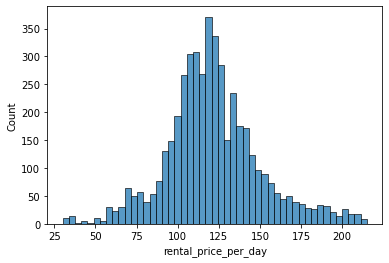

In [29]:
print('\nDescription of data distribution after removing possible outliers\n')
print(dataset2[cols_num[2]].describe())
print('\nPlotted distribution after removing possible outliers\n')
sns.histplot(dataset2, x= cols_num[2])
plt.show()

## Correspondance matrix

Let's find out the correlation between features and target column

In [37]:
#df.corr() function works for numeric columns. So non numerical columns will be factorized below.
for col in dataset2.columns:
    dtypes_fact = [object, bool]
    if dataset2[col].dtype in dtypes_fact :
        dataset2.loc[:, 'factorized_'+col] =pd.factorize(dataset2[col])[0]

dataset2.iloc[:,-7:].head(3)

C:\Users\lisbi\AppData\Local\Temp\ipykernel_17304\1627256632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.loc[:, 'factorized_'+col] =pd.factorize(dataset2[col])[0]
C:\Users\lisbi\AppData\Local\Temp\ipykernel_17304\1627256632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.loc[:, 'factorized_'+col] =pd.factorize(dataset2[col])[0]
C:\Users\lisbi\AppData\Local\Temp\ipykernel_17304\1627256632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,factorized_automatic_car,factorized_has_getaround_connect,factorized_has_speed_regulator,factorized_winter_tires,factorized_model_key_,factorized_fuel_,factorized_paint_color_
0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1
3,0,0,0,0,0,0,2


In [38]:
print('\nTop features corresponded to rental price per day\n')
corr_match=dataset2.corr().loc[:,['rental_price_per_day']].abs().sort_values(by='rental_price_per_day',ascending=False)
corr_match.head(20)


Top features corresponded to rental price per day



,rental_price_per_day
rental_price_per_day,1.000000
engine_power,0.638702
automatic_car,0.431681
factorized_automatic_car,0.431681
mileage,0.410626
factorized_model_key_,0.380635
factorized_model_key,0.364132
has_getaround_connect,0.362687
factorized_has_getaround_connect,0.362687
has_gps,0.286764


Correspondance matrix 



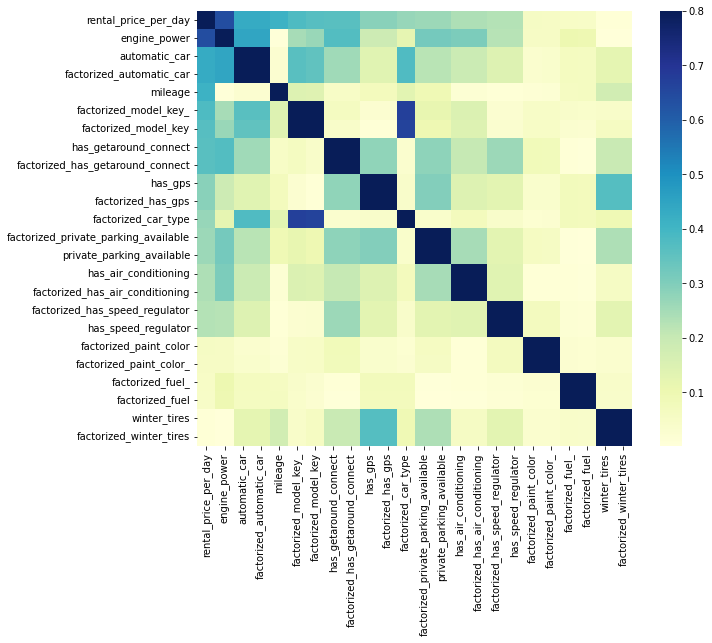

In [39]:
print("Correspondance matrix \n")
key_cols = corr_match.index #sorted column names 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset2[key_cols].corr().abs(), vmax=.8, square=True,  cmap="YlGnBu")
plt.show()

## Summary

Cleaned Pricing dataset has 4655 rows. 188 rows were suspected as outliers and removed.

rental_price_per_day is correlated :
* **very well** with engine_power, automatic_car, mileage

* **well** with  model_key_, has_getaround_connect, has_gps, car_type, private_parking_available, has_air_conditioning, has_speed_regulator

* **slightly** with paint_color_, fuel_, winter_tires

In [40]:
# Let's export database
dataset2.to_csv('../data/get_around_pricing_project_clean.csv', index=False)

-_-_-_-_- End of Notebook -_-_-_-_-
# End